# Script exploración

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor, plot_tree

In [2]:
df = pd.read_excel('04_analytics/train.xlsx')

## EDA

In [7]:
print(f'Tenemos {len(df)} filas y {len(df.columns)} columnas.')

Tenemos 155 filas y 214 columnas.


### Valores nulos

In [10]:
null_values = df.isnull().sum()
null_values_distribution = null_values[null_values > 0]
print(null_values_distribution)

LOTE_PARENTAL                        133
VOLUMEN_INOCULO_UTILIZADO_CULTIVO      5
CENTRIFUGACION_1_TURBIDEZ              4
CENTRIFUGACION_2_TURBIDEZ              9
BIO_G_AGITATION_PV_AVG                 1
                                    ... 
DESCARGAS_PARCIALES_2_MAX              9
TURBIDEZ_2_100                         5
TURBIDEZ_2_200                        25
TURBIDEZ_2_300                        26
TURBIDEZ_2_400                         8
Length: 197, dtype: int64


In [14]:
print(f'Tenemos un total de {null_values.sum()} valores nulos distribuidos en casi todas las columnas del dataset.')

Tenemos un total de 3891 valores nulos distribuidos en casi todas las columnas del dataset.


### Descripción general

In [15]:
df.dtypes.unique()

array([dtype('int64'), dtype('float64')], dtype=object)

Solo tenemos variables numéricas.

In [16]:
df.describe()

,LOTE,ORDEN_ENCADENADO,LOTE_PARENTAL,ID_BIORREACTOR_G,VOLUMEN_INOCULO_UTILIZADO_CULTIVO,TURBIDEZ_INICIO_CULTIVO,TURBIDEZ_FIN_CULTIVO,VIABILIDAD_FIN_CULTIVO,ID_CENTRIFUGA,CENTRIFUGACION_1_TURBIDEZ,...,DESCARGAS_TOTALES_2_AVG,DESCARGAS_TOTALES_2_MIN,DESCARGAS_TOTALES_2_MAX,DESCARGAS_PARCIALES_2_AVG,DESCARGAS_PARCIALES_2_MIN,DESCARGAS_PARCIALES_2_MAX,TURBIDEZ_2_100,TURBIDEZ_2_200,TURBIDEZ_2_300,TURBIDEZ_2_400
count,155.000000,155.000000,22.000000,155.000000,150.000000,155.000000,155.000000,1.550000e+02,155.000000,151.000000,...,126.000000,126.000000,126.000000,146.000000,146.000000,146.000000,150.000000,130.000000,129.000000,147.000000
mean,23336.638710,1.174194,23571.818182,14102.400000,81.429333,18.035613,74.617290,1.695665e+08,15055.716129,30.056821,...,0.982240,0.796259,1.425791,3421.342590,2593.171718,4251.434614,23.729600,23.491077,23.433178,22.928435
std,423.727658,0.413229,472.657697,693.770599,2.234772,3.268553,8.968955,3.817400e+07,2255.234666,15.015306,...,0.779434,0.787928,1.007238,2919.548136,3251.895925,3220.605297,17.304057,17.210627,18.242234,17.019844
min,23019.000000,1.000000,23085.000000,13169.000000,66.400000,12.560000,42.800000,7.040000e+07,6379.000000,21.280000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,9.600000,6.480000,8.160000
25%,23062.000000,1.000000,23112.250000,13170.000000,80.000000,16.440000,69.400000,1.468000e+08,12912.000000,26.520000,...,0.025000,0.000000,0.250000,0.000000,0.000000,0.000000,17.520000,17.720000,17.680000,17.400000
50%,23103.000000,1.000000,23567.500000,14614.000000,81.480000,17.760000,74.400000,1.648000e+08,14246.000000,28.640000,...,1.242347,0.576066,1.635514,3389.309070,0.000000,6673.744382,20.800000,20.640000,20.560000,20.320000
75%,24006.000000,1.000000,24034.750000,14616.000000,82.800000,18.760000,81.600000,1.909333e+08,17825.000000,30.440000,...,1.601026,1.550906,1.728444,6670.979134,6667.126412,6677.628054,25.340000,24.560000,24.000000,23.960000
max,24053.000000,3.000000,24051.000000,14617.000000,88.000000,44.400000,91.200000,3.696000e+08,17825.000000,168.800000,...,4.000000,4.000000,4.000000,6682.279416,6678.185938,6690.295313,157.840000,154.240000,156.880000,157.040000


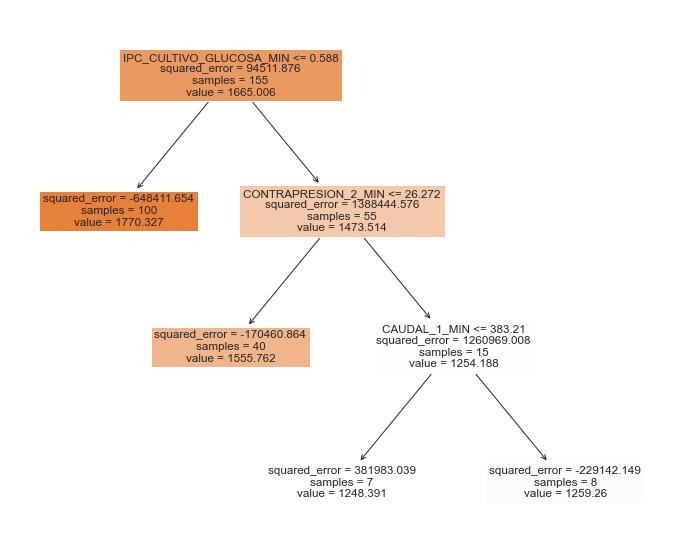

In [23]:
X = df.drop('PRODUCTO_1', axis=1)
y = df.PRODUCTO_1

dt = DecisionTreeRegressor(max_depth=3).fit(X, y)

plt.figure(figsize=(12,10))
plot_tree(dt, feature_names=X.columns, filled=True)
plt.show()

No parece que haya ninguna variable explicativa que separe de manera muy significativa el conjunto de datos según la target.

### Correlaciones

Veamos la matriz de correlaciones de las variables

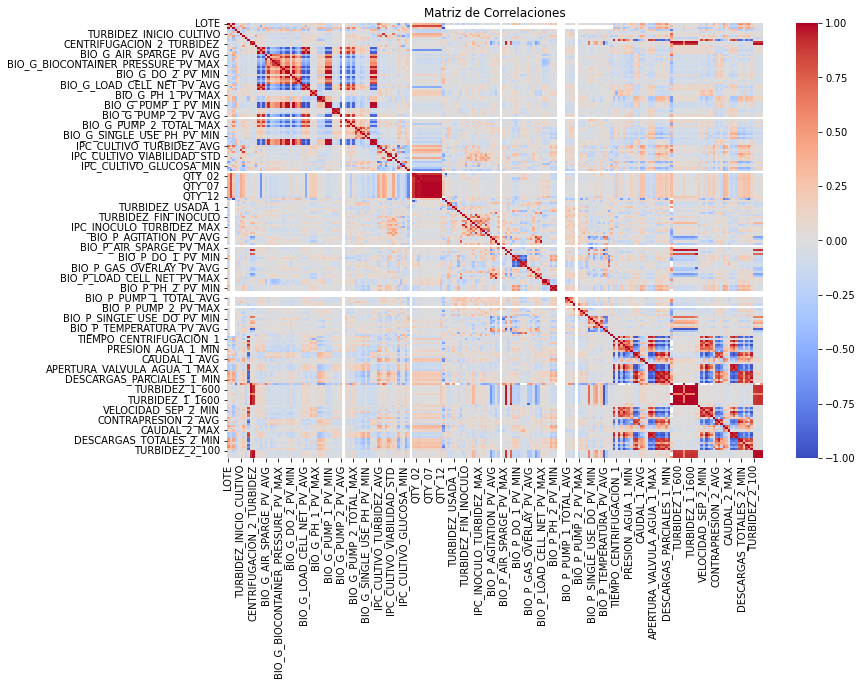

In [17]:
correlation_matrix = df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriz de Correlaciones')
plt.show()

Correlaciones con la target:

In [18]:
corr_with_target1 = correlation_matrix['PRODUCTO_1'].sort_values()
corr_with_target2 = correlation_matrix['PRODUCTO_1'].sort_values(ascending=False)
corr_with_target1

IPC_CULTIVO_GLUCOSA_MIN    -0.522474
HORAS_TOTALES_INOCULO      -0.281987
BIO_P_GAS_OVERLAY_PV_MIN   -0.245754
BIO_P_DO_1_PV_MIN          -0.195242
LOTE                       -0.174652
                              ...   
BIO_P_AIR_SPARGE_PV_MIN          NaN
BIO_P_PUMP_1_PV_AVG              NaN
BIO_P_PUMP_1_PV_MIN              NaN
BIO_P_PUMP_1_PV_MAX              NaN
BIO_P_PUMP_2_PV_MIN              NaN
Name: PRODUCTO_1, Length: 214, dtype: float64

In [19]:
corr_with_target2

PRODUCTO_1                  1.000000
TURBIDEZ_1_100              0.491805
TURBIDEZ_FIN_CULTIVO        0.475839
IPC_CULTIVO_TURBIDEZ_MAX    0.401094
IPC_CULTIVO_GLUCOSA_STD     0.393435
                              ...   
BIO_P_AIR_SPARGE_PV_MIN          NaN
BIO_P_PUMP_1_PV_AVG              NaN
BIO_P_PUMP_1_PV_MIN              NaN
BIO_P_PUMP_1_PV_MAX              NaN
BIO_P_PUMP_2_PV_MIN              NaN
Name: PRODUCTO_1, Length: 214, dtype: float64

Con la target no hay correlaciones muy fuertes, entre esto y la cantidad de valores NaN que tenemos, no parece buena idea usar Regresión Lineal como modelo de predicción.

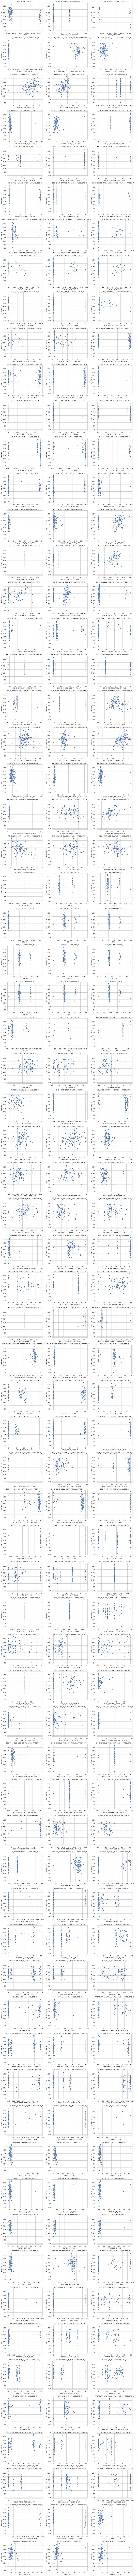

In [24]:
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns.drop('PRODUCTO_1')

n_cols = 3  
n_rows = int(len(numeric_columns) / n_cols) + 1  

plt.figure(figsize=(15, n_rows * 4))

for i, column in enumerate(numeric_columns, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.scatterplot(x=df[column], y=df['PRODUCTO_1'])
    plt.title(f'{column} vs PRODUCTO_1')
    plt.xlabel(column)
    plt.ylabel('PRODUCTO_1')

plt.tight_layout()
plt.show()

Podemos eliminar las columnas de lotes y de ids de biorreactores y centrifugas para no sesgar el modelo (además de que no separan la target relevantemente). También podemos eliminar las columnas absolutamente inútiles como son: BIO_G_PUMP_2_PV_MIN, BIO_P_AIR_SPARGE_PV_MIN, BIO_P_PUMP_1_PV_AVG, BIO_P_PUMP_1_PV_MIN, BIO_P_PUMP_1_PV_MAX, BIO_P_PUMP_2_PV_MIN

### Target

In [20]:
df.PRODUCTO_1.describe()

count     155.000000
mean     1665.006390
std       308.424365
min       526.400000
25%      1468.880000
50%      1681.424000
75%      1859.560000
max      2395.360000
Name: PRODUCTO_1, dtype: float64

In [21]:
df.PRODUCTO_1.isna().sum()

0

No tiene valores nulos la target. Veamos su distribución:

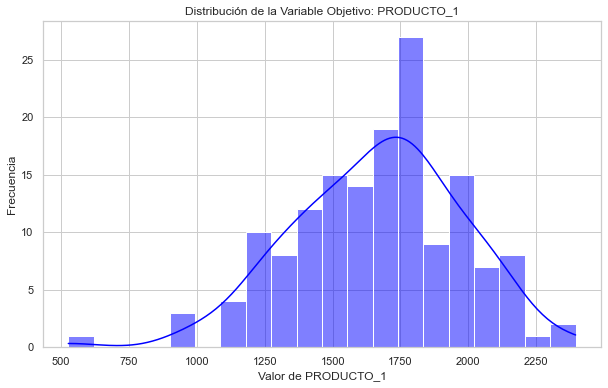

In [22]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.histplot(df.PRODUCTO_1, bins=20, kde=True, color='blue')
plt.title('Distribución de la Variable Objetivo: PRODUCTO_1')
plt.xlabel('Valor de PRODUCTO_1')
plt.ylabel('Frecuencia')
plt.show()

## Modelos testados

En este apartado probamos algunos modelos de Machine Learning que soporten valores nulos como Árboles de Decisión, Random Forest, Gradient Boosting o XGBoost.

Primero haremos una búsqueda de hiperparámetros óptimos los cuales seleccionaremos evaluando los modelos mediante validación cruzada para lograr resultados lo más robustos posibles ante la escasa cantidad de datos que disponemos.

Cuando elijamos estos hiperparámetros, reentrenaremos el modelo con todos los datos para enriquecerlo al máximo y nos lo guardaremos para poder reutilizarlo.

Posteriormente generaremos las predicciones para el conjunto de test y elegiremos como modelo final aquel que logre el menor RMSE en este conjunto de test.

In [3]:
from sklearn.metrics import root_mean_squared_error
from sklearn.model_selection import cross_val_score
from joblib import dump
import time

### Decision Tree

In [26]:
from sklearn.tree import DecisionTreeRegressor, plot_tree


metrics = {}
for max_depth in [2, 3, 4, 5, 7, 10, 15, 20, 25]:
    model = DecisionTreeRegressor(max_depth=max_depth, random_state=73)
    rmse_scores = - cross_val_score(model, X, y, scoring='neg_root_mean_squared_error')

    metrics[f'dt_{max_depth}'] = {
        'RMSE_1': rmse_scores[0],
        'RMSE_2': rmse_scores[1],
        'RMSE_3': rmse_scores[2],
        'RMSE_4': rmse_scores[3],
        'RMSE_5': rmse_scores[4],
        'MEAN_RMSE': rmse_scores.mean()
    }

metrics_dt = pd.DataFrame.from_dict(metrics, orient='index',columns=['RMSE_1', 'RMSE_2', 'RMSE_3', 'RMSE_4', 'RMSE_5', 'MEAN_RMSE'])
metrics_dt.sort_values(by='MEAN_RMSE')

,RMSE_1,RMSE_2,RMSE_3,RMSE_4,RMSE_5,MEAN_RMSE
dt_2,229.133339,312.957358,334.933600,325.428312,270.119888,294.514499
dt_3,242.158622,307.022417,339.901122,331.479172,263.746988,296.861664
dt_10,230.786687,304.228945,339.901122,356.364320,259.793227,298.214860
dt_15,230.786687,304.228945,339.901122,356.364320,259.793227,298.214860
dt_20,230.786687,304.228945,339.901122,356.364320,259.793227,298.214860
dt_25,230.786687,304.228945,339.901122,356.364320,259.793227,298.214860
dt_7,230.786687,304.039777,339.901122,356.364320,262.249560,298.668293
dt_5,241.991269,317.548378,339.901122,337.853223,267.656595,300.990117
dt_4,247.132547,308.665967,339.901122,347.354404,301.383367,308.887482


In [28]:
time1 = time.time()
dt = DecisionTreeRegressor(max_depth=2, random_state=73).fit(X, y)
time2 = time.time() - time1
preds = dt.predict(X)
rmse = root_mean_squared_error(y, preds)
print('Tiempo de ejecución: '+str(time2)+' segundos. \nRMSE sobre el train: '+str(rmse))

Tiempo de ejecución: 0.009972572326660156 segundos. 
RMSE sobre el train: 272.9012478217613


Lo guardamos ajustado

In [ ]:
dump(dt, '../06_model_output/models/decision_tree.joblib')

El árbol resultante tiene la siguiente forma:

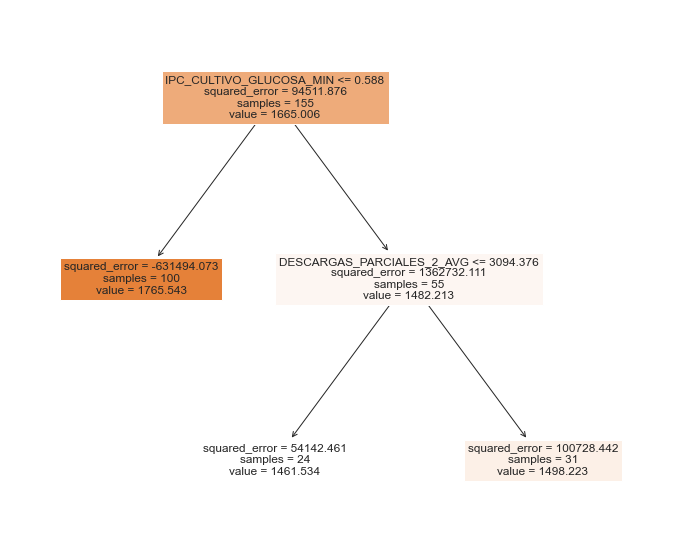

In [29]:
plt.figure(figsize=(12,10))
plot_tree(dt, feature_names=X.columns, filled=True);

### Random Forest

In [30]:
from sklearn.ensemble import RandomForestRegressor


metrics = {}
for n_estimators in [5, 10, 25, 50, 100, 250, 500, 1000]:
    for max_depth in [2, 3, 5, 7, 10]:
        model = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth, random_state=73)
        rmse_scores = - cross_val_score(model, X, y, scoring='neg_root_mean_squared_error')

        metrics[f'rf_{n_estimators}_{max_depth}'] = {
            'RMSE_1': rmse_scores[0],
            'RMSE_2': rmse_scores[1],
            'RMSE_3': rmse_scores[2],
            'RMSE_4': rmse_scores[3],
            'RMSE_5': rmse_scores[4],
            'MEAN_RMSE': rmse_scores.mean()
        }

metrics_rf = pd.DataFrame.from_dict(metrics, orient='index',columns=['RMSE_1', 'RMSE_2', 'RMSE_3', 'RMSE_4', 'RMSE_5', 'MEAN_RMSE'])
metrics_rf.sort_values(by='MEAN_RMSE')

,RMSE_1,RMSE_2,RMSE_3,RMSE_4,RMSE_5,MEAN_RMSE
rf_1000_3,224.052270,263.165380,321.574979,345.025362,252.909558,281.345510
rf_500_3,223.980140,264.035186,322.127216,346.442125,251.280478,281.573029
rf_1000_7,224.630702,263.955236,321.243718,345.018469,254.708832,281.911392
rf_1000_10,224.378666,263.917980,321.352656,345.050002,254.984610,281.936783
rf_1000_5,224.513754,263.893320,321.412235,344.677170,255.234826,281.946261
rf_500_2,225.432778,262.545550,323.134738,346.246188,252.459699,281.963791
rf_50_3,226.333669,267.591310,319.166187,345.921945,250.821734,281.966969
rf_1000_2,226.063715,261.845882,322.340483,345.583150,254.222467,282.011140
rf_500_5,225.046279,264.808194,322.474782,345.985669,254.544850,282.571955
rf_500_10,224.683474,265.148291,322.350492,346.967835,253.844005,282.598819


In [31]:
time1 = time.time()
rf = RandomForestRegressor(n_estimators=500, max_depth=3, random_state=73).fit(X, y)
time2 = time.time() - time1
preds = rf.predict(X)
rmse = root_mean_squared_error(y, preds)
print('Tiempo de ejecución: '+str(time2)+' segundos. \nRMSE sobre el train: '+str(rmse))

Tiempo de ejecución: 2.5582053661346436 segundos. 
RMSE sobre el train: 225.0270542375371


In [ ]:
dump(rf, '../06_model_output/models/random_forest.joblib')

### Gradient Boosting

In [32]:
from sklearn.ensemble import HistGradientBoostingRegressor


metrics = {}
for n_estimators in [5, 10, 25, 50, 100, 250, 500]:
    for max_depth in [2, 3, 5, 7]:
        for eta in [0.05, 0.1, 0.2, 0.5]:
            model = HistGradientBoostingRegressor(max_iter=n_estimators, max_depth=max_depth, learning_rate=eta, random_state=73)
            rmse_scores = - cross_val_score(model, X, y, scoring='neg_root_mean_squared_error')

            metrics[f'gb_{n_estimators}_{max_depth}_{eta}'] = {
                'RMSE_1': rmse_scores[0],
                'RMSE_2': rmse_scores[1],
                'RMSE_3': rmse_scores[2],
                'RMSE_4': rmse_scores[3],
                'RMSE_5': rmse_scores[4],
                'MEAN_RMSE': rmse_scores.mean()
            }

metrics_gb = pd.DataFrame.from_dict(metrics, orient='index',columns=['RMSE_1', 'RMSE_2', 'RMSE_3', 'RMSE_4', 'RMSE_5', 'MEAN_RMSE'])
metrics_gb.sort_values(by='MEAN_RMSE')

,RMSE_1,RMSE_2,RMSE_3,RMSE_4,RMSE_5,MEAN_RMSE
gb_10_3_0.1,216.087500,241.009030,319.250822,343.474588,235.189850,271.002358
gb_5_2_0.2,212.045881,248.048260,323.510075,340.496842,232.136023,271.247416
gb_25_7_0.05,212.033291,239.221205,330.175977,340.033792,238.189179,271.930689
gb_25_5_0.05,212.033291,239.221205,330.175977,340.033792,238.189179,271.930689
gb_50_5_0.05,210.994235,246.718876,341.454118,326.428995,234.962269,272.111699
...,...,...,...,...,...,...
gb_25_2_0.5,285.427581,291.003472,374.812329,326.602728,325.414352,320.652093
gb_50_2_0.5,301.102345,295.236750,375.799381,327.205519,314.443428,322.757485
gb_500_2_0.5,310.157934,294.047700,377.841690,326.468318,315.472158,324.797560
gb_250_2_0.5,310.155707,294.049428,377.840225,326.470882,315.472165,324.797681


In [33]:
time1 = time.time()
gb = HistGradientBoostingRegressor(max_iter=5, max_depth=2, learning_rate=0.2, random_state=73).fit(X, y)
time2 = time.time() - time1
preds = gb.predict(X)
rmse = root_mean_squared_error(y, preds)
print('Tiempo de ejecución: '+str(time2)+' segundos. \nRMSE sobre el train: '+str(rmse))

Tiempo de ejecución: 0.0359036922454834 segundos. 
RMSE sobre el train: 231.2168645987376


In [ ]:
dump(gb, '../06_model_output/models/gradient_boost.joblib')

### Support Vector Regression

In [5]:
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import numpy as np

In [6]:
# Imputar valores faltantes
imputer = SimpleImputer(strategy='mean')  # Puedes cambiar a 'median' si prefieres
X_train_imputed = imputer.fit_transform(X)

# Normalizar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)

# Definir el espacio de hiperparámetros a explorar
param_distributions = {
    'C': np.logspace(-3, 3, 7),  # Valores de C en una escala logarítmica
    'epsilon': np.linspace(0, 1, 10),  # Valores de epsilon entre 0 y 1
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],  # Diferentes tipos de kernels
}

# Inicializa el modelo SVR
svr_model = SVR()

# Configurar RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=svr_model,
                                   param_distributions=param_distributions,
                                   n_iter=20,  # Número de combinaciones a probar
                                   scoring='neg_mean_squared_error', 
                                   cv=3,  # Número de folds en cross-validation
                                   n_jobs=-1,  # Usa todos los núcleos disponibles
                                   verbose=1,
                                   random_state=42)  # Para reproducibilidad

# Realizar la búsqueda de hiperparámetros
random_search.fit(X_train_scaled, y)

# Obtener los mejores hiperparámetros
best_params = random_search.best_params_
print("Mejores hiperparámetros encontrados:")
print(best_params)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
Mejores hiperparámetros encontrados:
{'kernel': 'rbf', 'epsilon': 0.8888888888888888, 'C': 1.0}


In [8]:
# Reentrenamos el mejor modelo
time1 = time.time()
# Inicializar y entrenar el modelo SVR
svr_model = SVR(kernel='rbf', C=1, epsilon=0.8888888888888888).fit(X_train_scaled, y)  # Ajustar C y epsilon según sea necesario
time2 = time.time() - time1
preds = svr_model.predict(X_train_scaled)
rmse = root_mean_squared_error(y, preds)
print('Tiempo de ejecución: '+str(time2)+' segundos. \nRMSE sobre el train: '+str(rmse))

Tiempo de ejecución: 0.0050127506256103516 segundos. 
RMSE sobre el train: 306.8311113563023


### CatBoost

In [13]:
from catboost import CatBoostRegressor


# Definir los hiperparámetros a explorar
param_distributions = {
    'iterations': np.random.randint(500, 1500, size=10),  # Número de árboles, exploramos entre 500 y 1500
    'learning_rate': np.random.uniform(0.01, 0.2, size=10),  # Tasa de aprendizaje entre 0.01 y 0.2
    'depth': np.random.randint(4, 10, size=10),  # Profundidad de los árboles entre 4 y 10
    'l2_leaf_reg': np.random.choice([3, 5, 7, 10], size=10),  # Regularización L2
}

# Inicializa el modelo CatBoost
model = CatBoostRegressor(loss_function='RMSE', verbose=0)

# Configurar la búsqueda aleatoria
random_search = RandomizedSearchCV(estimator=model,
                                   param_distributions=param_distributions,
                                   n_iter=20,  # Número de combinaciones a probar
                                   scoring='neg_mean_squared_error', 
                                   cv=3,  # Número de folds en cross-validation
                                   n_jobs=-1,  # Usa todos los núcleos disponibles
                                   verbose=1,
                                   random_state=42)  # Para reproducibilidad

# Realizar la búsqueda de hiperparámetros
random_search.fit(X, y)

# Obtener los mejores hiperparámetros
best_params = random_search.best_params_
print("Mejores hiperparámetros encontrados:")
print(best_params)

Fitting 3 folds for each of 20 candidates, totalling 60 fits

Mejores hiperparámetros encontrados:
{'learning_rate': 0.036850812969352366, 'l2_leaf_reg': 5, 'iterations': 750, 'depth': 9}

In [14]:
# Reentrenamos el mejor modelo
time1 = time.time()
# Inicializar y entrenar el modelo
model = CatBoostRegressor(iterations=750, learning_rate=0.036850812969352366, depth=9, loss_function='RMSE', verbose=100, l2_leaf_reg= 5).fit(X, y)
time2 = time.time() - time1
preds = model.predict(X)
rmse = root_mean_squared_error(y, preds)
print('Tiempo de ejecución: '+str(time2)+' segundos. \nRMSE sobre el train: '+str(rmse))

0:	learn: 305.2937185	total: 229ms	remaining: 2m 51s
100:	learn: 155.2540447	total: 8.05s	remaining: 51.7s
200:	learn: 83.2154837	total: 15.6s	remaining: 42.7s
300:	learn: 42.3493228	total: 23.1s	remaining: 34.4s
400:	learn: 23.2009527	total: 30.8s	remaining: 26.8s
500:	learn: 12.6215247	total: 38.3s	remaining: 19s
600:	learn: 6.8856052	total: 45.4s	remaining: 11.3s
700:	learn: 3.7149750	total: 52.7s	remaining: 3.69s
749:	learn: 2.7243844	total: 56.5s	remaining: 0us
Tiempo de ejecución: 56.88727045059204 segundos. 
RMSE sobre el train: 2.7243882214391943
